In [48]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pathresults = "../results/"
#pathresults = "/DUMUXDune27/DUMUX/dumux-rosi/python/paperSc/results/"
data_file_delimiter = ","
import plotnine

from plotnine import *
import matplotlib
viridis = matplotlib.colormaps.get_cmap('viridis')

# get param set
paramsets =  pd.read_csv('../output_random_rows.csv')
paramsets = paramsets.drop(paramsets.columns.tolist()[-1],axis=1)
outputvalsname =  ['wat','cs','cl','coa','cod','cca','ccd','css2','co2','yX','yY','yZ']
column_names = outputvalsname + paramsets.columns.tolist()
paramsets.drop('theta',inplace=True, axis=1)

df = pd.read_pickle("./cyl10to11_1d1dF.pkl")  # cid, pSet, rr, 1 or 9


numPset = 99
nKonz = 9
dictXYZ = {9:'X',10:'Y',11:'Z'}
volIdx=12
lenIdx=13
relLenId=14
coordId = 15
nToGet = coordId+1 #elements + 3d coordinates of y , node+vol+len+st 

In [13]:

dfb = pd.read_pickle("./cyl10to11_NO_1d1dF.pkl")  # cid, pSet, rr, 1 or 9

In [30]:
[abs(np.array(ff).reshape(-1)).max() for ff in (dff/dfb)[0]*100]

[1.6467349046175088,
 60.65294185386485,
 5.195252614022775,
 64412.46248120945,
 8964.770004980806,
 nan,
 nan,
 nan,
 10290201.91844403,
 1189.1435690532721,
 8.909969122053635,
 0.1721377506338198,
 48.33945724052644,
 1.7763568394002497e-13,
 0.0,
 16.64725500595986]

In [38]:
dfd01 = abs((dff/dfb)[0][1]*100)

In [59]:
dff

0  \
0   [[-4.6977218975952084e-07, -4.6980042067712446...   
1   [[-2.305005152066354e-09, -3.1047757544328485e...   
2   [[-1.2734593964514214e-07, -7.434914891016851e...   
3   [[-6.726072760786358e-10, -1.3587429602077156e...   
4   [[6.567466985513098e-10, 9.755199378258766e-11...   
5   [[-9.243052640904581e-06, -2.5507894593983606e...   
6   [[4.208922212046648e-06, -1.41447981886339e-07...   
7   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]...   
8   [[-0.000482891555865006, -3.144685257974039e-0...   
9   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
10  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
11  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
12  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]...   
13  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
14  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
15  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]...   

                                                    1  \
0   [[-4.809931230215225e-05, -4.809931230215225e-...   
1   [[1.2621782884314383e-08, 2.2404780692544605e-...   
2   [[2.147415680839662e-06, 2.7990065163039334e-0...   
3   [[6.811735460855621e-08, 3.116960798086435e-07...   
4   [[-6.60340303274348e-08, -3.0938876381152443e-...   
5   [[6.609747780923249e-05, -4.913512410379717e-0...   
6   [[-4.576720767624463e-06, -4.975155151480844e-...   
7   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]...   
8   [[0.006195691810773507, -0.004590791386081705,...   
9   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
10  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
11  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
12  [[-2.9331014048511114e-05, -5.2953723112049086...   
13  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
14  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
15  [[-3.9415423702011954e-05, -0.0001327789411363...   

                                                    2  
0   [[-9.369798908975824e-08, -9.362768374487906e-...  
1   [[3.6300779377002024e-11, -1.8638466472960865e...  
2   [[1.143265747544954e-08, 5.979424145922951e-09...  
3   [[1.6646751275481214e-11, 5.1654953339362304e-...  
4   [[-1.615407278654145e-11, -5.0200194043377856e...  
5   [[8.312265119096718e-08, 3.0319964274190016e-0...  
6   [[-1.029967055419731e-07, -9.105987954340436e-...  
7   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]...  
8   [[-2.0777245985925674e-06, -5.394697608490651e...  
9   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
10  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
11  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
12  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]...  
13  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
14  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
15  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]...

In [64]:
print(np.array((dff[0][1]/dfb[0][1]*100), dtype =int))
print(dff[0][1][17]/dfb[0][1][17]*100)
print(dfb[0][1][17],df[0][1][17])

[[  0   0   0   0   0   0   0   0   0]
 [  0   9  14  14  14  14  14  14  14]
 [  1  14  28  35  37  38  38  39  39]
 [ -1 -15 -23 -28 -29 -29 -27 -25 -24]
 [  4   4   4   5   5   5   5   5   6]
 [  3   3   4   4   5   5   6   6   6]
 [ -1  -1  -1  -1   0   0   0   0   0]
 [  2  24  24  23  23  23  23  23  23]
 [  1  24  23  23  23  22  22  22  22]
 [  0 -19 -18 -17 -17 -16 -15 -15 -14]
 [  1  13  13  13  13  13  13  13  13]
 [  0   0   2   3   3   3   3   3   3]
 [  3  20  32  33  31  30  30  29  28]
 [ 18  51  60  49  31  13   1  -6  -9]
 [  0  -3  -4  -5  -7  -9 -11 -13 -14]
 [  1  15  27  39  47  52  55  57  58]
 [ -5 -31 -35 -35 -34 -34 -34 -33 -33]
 [ -1  -3  -8 -14 -20 -26 -31 -34 -36]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   1   2   2]
 [  0   0   0   0   0   0   0   1   1]
 [ -1  -4  -5  -5  -6  -7  -8  -8  -9]
 [  0   0   0   1   2   3   4   6   7]
 [ -7 -18 -22 -19 -13  -7

In [37]:
[max(abs((dff/dfb)[0][i]*100).reshape(-1)) for i in range(9)]

[1.6467349046175088,
 60.65294185386485,
 5.195252614022775,
 64412.46248120945,
 8964.770004980806,
 inf,
 inf,
 nan,
 10290201.91844403]

In [36]:
max(dfd02.reshape(-1))

5.195252614022775

In [3]:
konzc = df.loc[[i for i in range(nKonz)]]# pSet, rr, 9
vols = df.loc[volIdx]# pSet, rr, 9
lens = df.loc[lenIdx]# pSet, rr, 1
reLens =  df.loc[relLenId]
coords =  df.loc[coordId]
theta = df.loc[[0]]

In [49]:
dfnew = pd.DataFrame(columns=['locCylId','coords','konzcs','vols','lens','reLens','pSet'])
scsc = ["none","earlyDry","lateDry"]
for pSet in range(3):
    if len(coords.loc[pSet]) > 0:

        cyltr = len(lens.loc[pSet])# 21 or 22
        locCylId = np.array([np.full(9,ii) for ii in range(cyltr)])
        locCellId = np.full((cyltr,9),np.array([i for i in range(9)]))

        myData = pd.DataFrame({'locCylId':locCylId.reshape(-1)})

        myData['locCellId']= locCellId.reshape(-1)
        myData['coords']= coords.loc[pSet].reshape(-1)

        myData['konzc0']= np.array(list(theta[pSet])).reshape(-1)#theta[pSet].reshape(-1)
        for cid in range(1,nKonz):
            myData['konzc'+str(cid)]= konzc.loc[cid][pSet].reshape(-1)
        myData['vols']= vols.loc[pSet].reshape(-1)

        lens__ = lens.loc[pSet]
        lens_ = np.array([np.full(9, ll) for ll in lens__])
        reLens__ = reLens.loc[pSet]
        reLens_ = np.array([np.full(9, ll) for ll in reLens__])
        myData['lens']= lens_.reshape(-1)
        myData['reLens']= reLens_.reshape(-1)
        myData['pSet'] = scsc[pSet]

        dfnew = pd.concat([dfnew, myData], ignore_index=True)
    

In [51]:
if True:
    dfnew['rIn'] = -1
    dfnew['rOut'] = -1
    dfnew.loc[dfnew['locCellId']==0,'rIn'] = 0.05
    for pSet in range(3):
        cyltr = len(lens.loc[pSet])
        print(cyltr)
        for cylid in range(cyltr):
            #lenCyl = dfnew[dfnew['pSet']==pSet][dfnew['locCylId']==cylid]['rIn'] 
            for cellid in range(1,9):
                rowcell = dfnew.loc[(dfnew['pSet']==scsc[pSet])&(dfnew['locCylId']==cylid)&(dfnew['locCellId']==cellid)].index.tolist()[0]
                lencyl = dfnew.at[rowcell,'lens']
                vol =  dfnew.at[rowcell,'vols']
                dfnew.at[rowcell,'rOut'] = np.sqrt(vol/(np.pi*lencyl) +dfnew.at[rowcell,'rIn']**2 )

                if cellid < 8:
                    rownextcell = dfnew.loc[(dfnew['pSet']==scsc[pSet])&(dfnew['locCylId']==cylid)&(dfnew['locCellId']==0)].index.tolist()[0]
                    dfnew.at[rownextcell,'rIn'] = dfnew.at[rowcell,'rOut']


28
26
27


In [56]:

def bin_and_plot(dataframe, independent_variable, dependent_variable, doLog=False, 
                 colVar = None, logcolvar = False, psetsInput = None, normalcolvar = True, 
                 scatter_ = False, spearateSets= True):
    if psetsInput is None:
        psetsInput = [i for i in range(99)]
    if( colVar is not None) and (normalcolvar ==True):
        maxV = dataframe[colVar].max()
        minV = dataframe[colVar].min()
        
    # Create the plot
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed

    # Loop to plot each line
    for i in psetsInput:
        
        if len(coords.loc[pSet]) > 0:
            df_ = dataframe[dataframe['pSet']==i]
            bin_meansZ = df_[dependent_variable]
            bin_meansX = df_[independent_variable]
            #print('bin_means',bin_meansZ, 'bin_sums',bin_meansX)
            if colVar is None:
                if not scatter_:
                    if i is int:
                        plt.plot( bin_meansX.values, bin_meansZ.values,label=f'Line {i+1}')
                    else:
                        plt.plot( bin_meansX.values, bin_meansZ.values,label=i)
                else:
                    if i is int:
                        plt.scatter( bin_meansX.values, bin_meansZ.values,label=f'Line {i+1}')
                    else:
                        plt.scatter( bin_meansX.values, bin_meansZ.values,label=i)
                    
            else:
                
                    
                if not scatter_:
                    ourVal = df_[colVar][0]
                    if logcolvar:
                        normVal =np.log(ourVal)# (ourVal - minV)/(maxV - minV))

                    elif normalcolvar:
                        normVal = (ourVal - minV)/(maxV - minV)
                    else:
                        normVal = ourVal
                    if i is int:
                        plt.plot( bin_meansX.values, bin_meansZ.values,label=f'Line {i+1}',c=viridis(normVal))
                    else:
                        plt.plot( bin_meansX.values, bin_meansZ.values,label=i,c=viridis(normVal))
                else:
                    normVal=df_[colVar]
                    if normalcolvar:
                        normVal = (df_[colVar] - minV)/(maxV - minV)
                    if i is int:
                        plt.scatter( bin_meansX.values, bin_meansZ.values,label=f'Line {i+1}',c=normVal)
                    else:
                        plt.scatter( bin_meansX.values, bin_meansZ.values,label=i,c=normVal)
                if spearateSets:
                    plt.xlabel( independent_variable)
                    plt.ylabel( dependent_variable)
                    if doLog:
                        plt.yscale('log')
                    if colVar is not None:
                        plt.title(colVar)
                    plt.grid(True)
                    plt.show()
            
    if not spearateSets:
        plt.xlabel( independent_variable)
        plt.ylabel( dependent_variable)
        if doLog:
            plt.yscale('log')
        if colVar is not None:
            plt.title(colVar)
        plt.grid(True)
        plt.show()

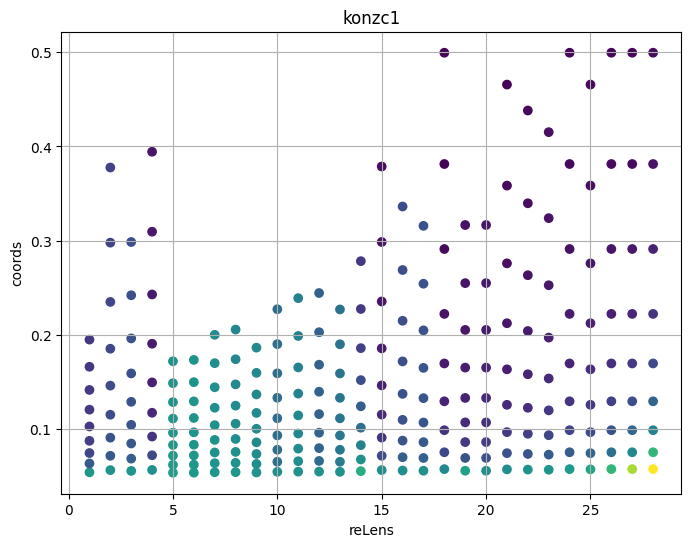

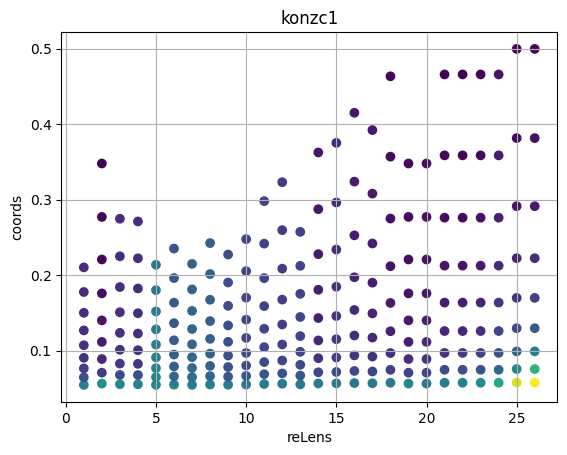

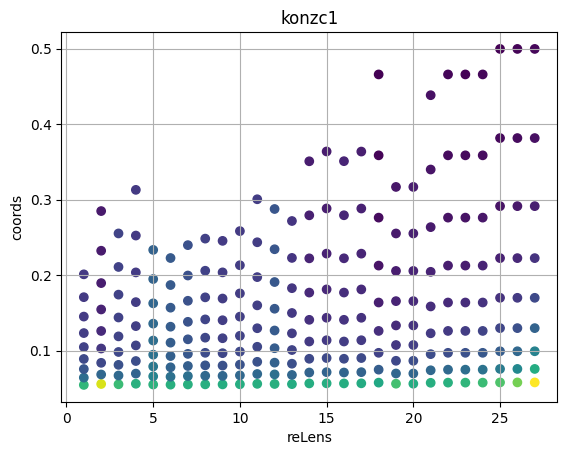

In [65]:
bin_and_plot(dfnew, 'reLens',"coords", doLog=False, colVar =  "konzc1", psetsInput =["none","earlyDry","lateDry"], 
             normalcolvar = False, scatter_=True , spearateSets= True)

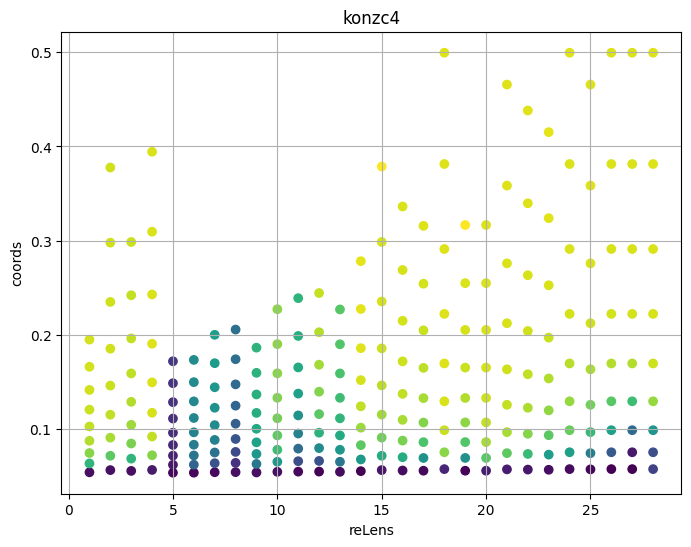

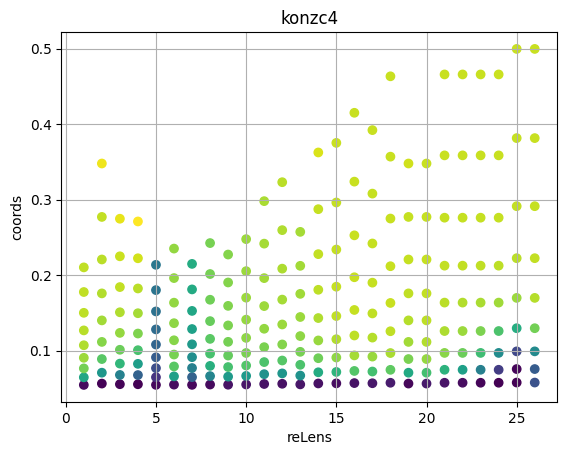

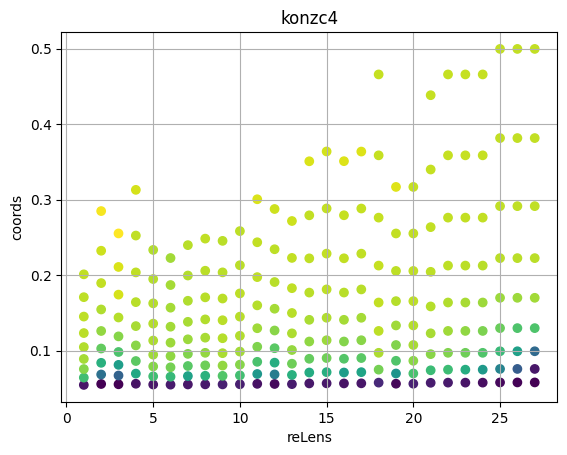

In [58]:
bin_and_plot(dfnew, 'reLens',"coords", doLog=False, colVar =  "konzc4", psetsInput =["none","earlyDry","lateDry"], 
             normalcolvar = True, scatter_=True , spearateSets= True)

In [ ]:
df04 = dfnew
df04['konzc4'] -= 

In [6]:
obsDis = 0.1

dfnew = pd.DataFrame(columns=['locCylId','cs','reLens','pSet'])

for pSet in range(3):
    if len(coords.loc[pSet]) > 0:
    
        cyltr = len(lens.loc[pSet])# 21 or 22
        locCylId = np.array([ii for ii in range(cyltr)])

        myData = pd.DataFrame({'locCylId':locCylId.reshape(-1)})

        #myData['locCellId']= locCellId#.reshape(-1)
        #myData['coords']= coords.loc[pSet]#.reshape(-1)

        #myData['konzcs']= konzcs.loc[pSet]#.reshape(-1)
        #myData['vols']= vols.loc[pSet]#.reshape(-1)

        #myData['lens']= lens.loc[pSet]
        myData['reLens']= reLens.loc[pSet]
        myData['pSet'] =  scsc[pSet]

        for cid in range(nKonz):
            y_interp =np.array([np.interp(obsDis, coords.loc[pSet][cylloc],konzc.loc[cid][pSet][cylloc]) for cylloc in range(cyltr)])
            myData['konzc'+str(cid)] = y_interp
        dfnew = pd.concat([dfnew, myData], ignore_index=True)
    

In [7]:

def bin_and_plot(dataframe, independent_variable, dependent_variable, doLog=False, 
                 colVar = None, logcolvar = False, psetsInput = None, normalcolvar = True):
    if psetsInput is None:
        psetsInput = [i for i in range(99)]
    if( colVar is not None) and (normalcolvar ==True):
        maxV = paramsets[colVar].max()
        minV = paramsets[colVar].min()
        
    # Create the plot
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed

    # Loop to plot each line
    for i in psetsInput:
        
        if len(coords.loc[pSet]) > 0:
            df_ = dataframe[dataframe['pSet']==i]
            bin_meansZ = df_[dependent_variable]
            bin_meansX = df_[independent_variable]
            #print('bin_means',bin_meansZ, 'bin_sums',bin_meansX)
            if colVar is None:
                if i is int:
                    plt.plot( bin_meansX.values, bin_meansZ.values,label=f'Line {i+1}')
                else:
                    plt.plot( bin_meansX.values, bin_meansZ.values,label=i)
            else:
                ourVal = df_[colVar][0]
                if logcolvar:
                    normVal =np.log(ourVal)# (ourVal - minV)/(maxV - minV))
                    
                elif normalcolvar:
                    normVal = (ourVal - minV)/(maxV - minV)
                else:
                    normVal = ourVal
                plt.plot( bin_meansX.values, bin_meansZ.values,label=f'Line {i+1}',c=viridis(normVal))
            
        
    plt.xlabel( independent_variable)
    plt.ylabel( dependent_variable)
    if doLog:
        plt.yscale('log')
    if colVar is not None:
        plt.title(colVar)
    plt.grid(True)
    plt.show()

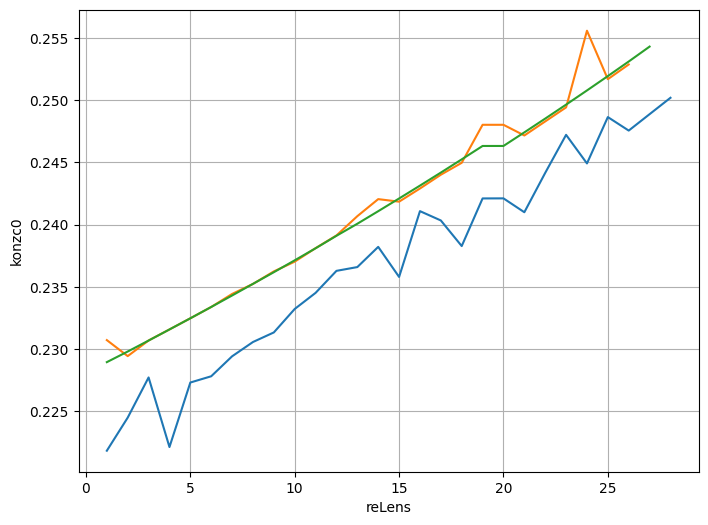

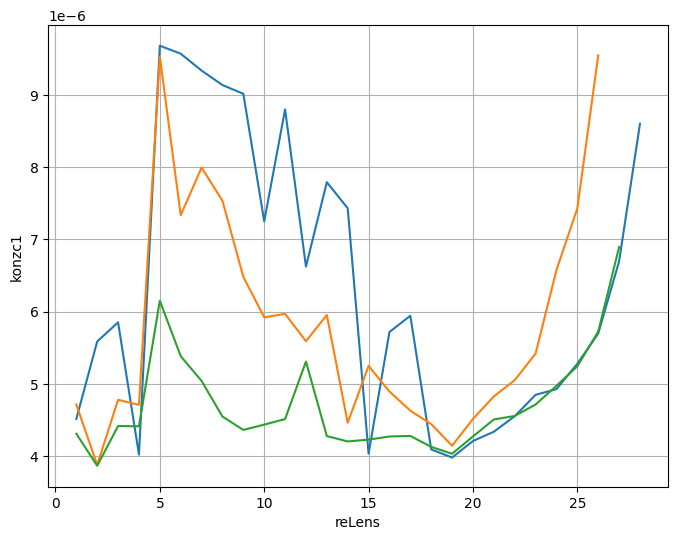

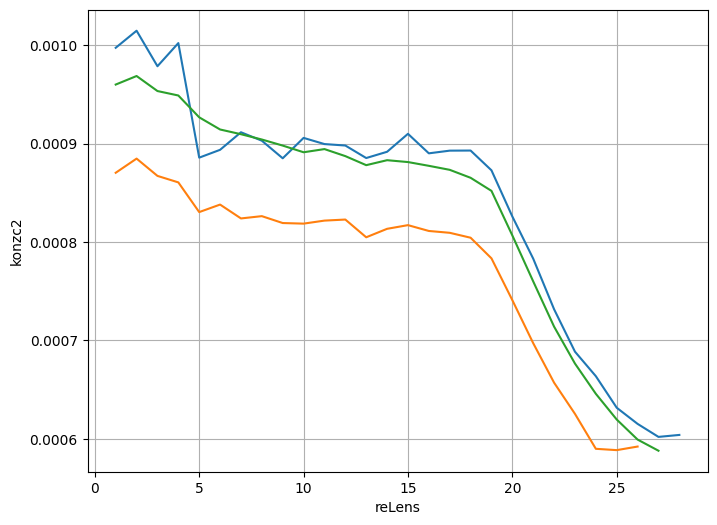

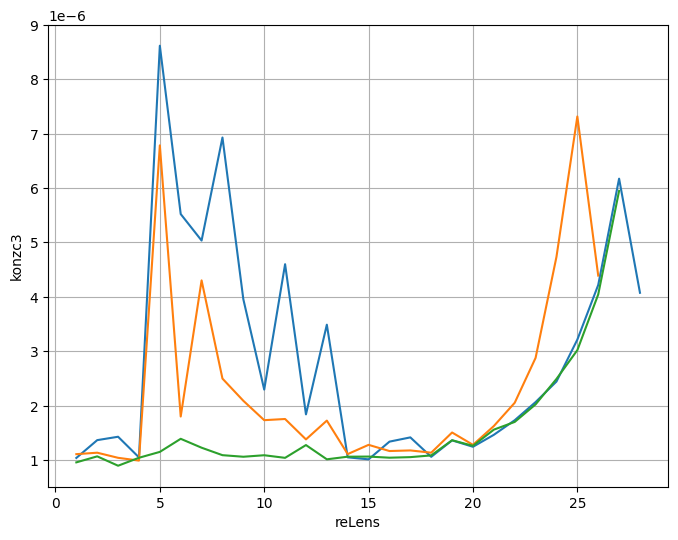

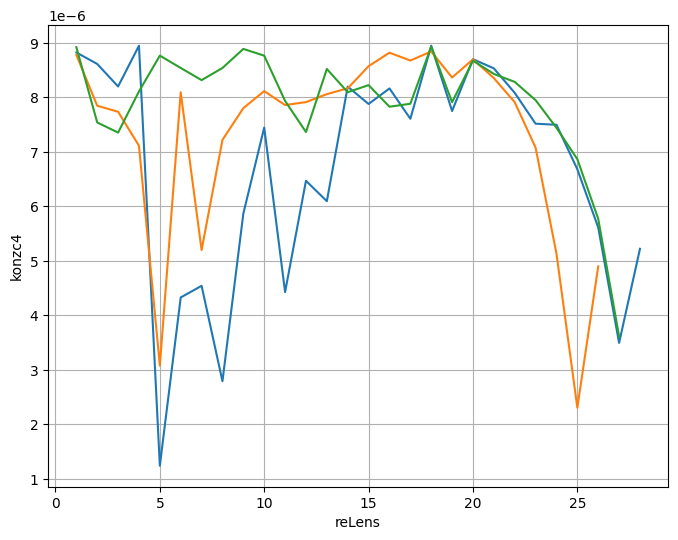

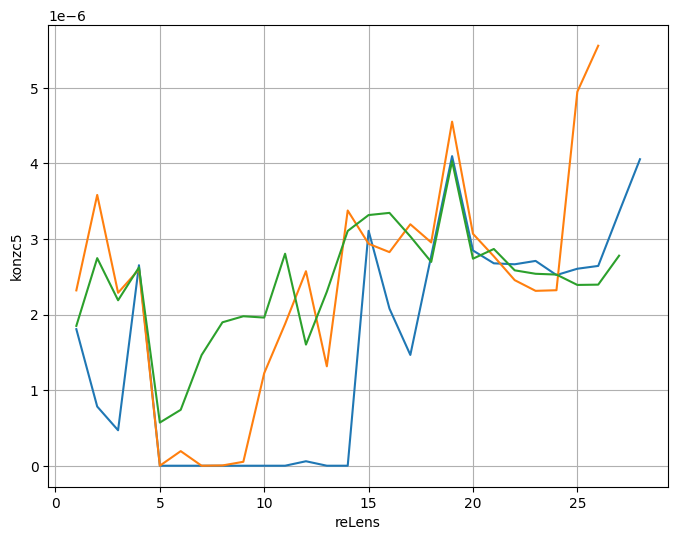

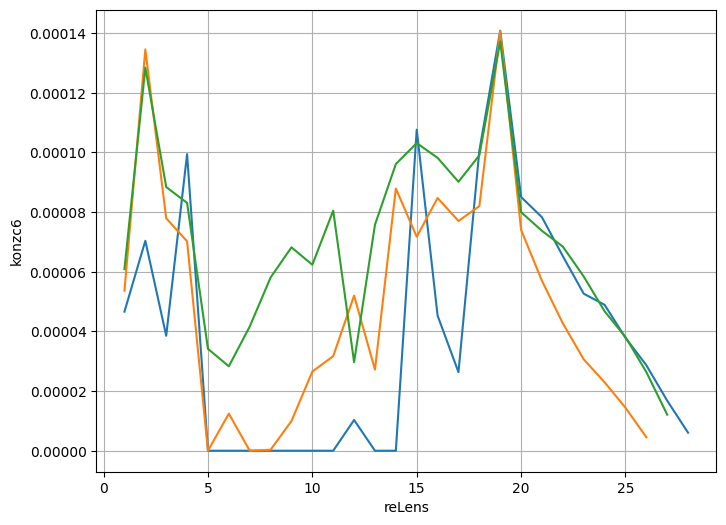

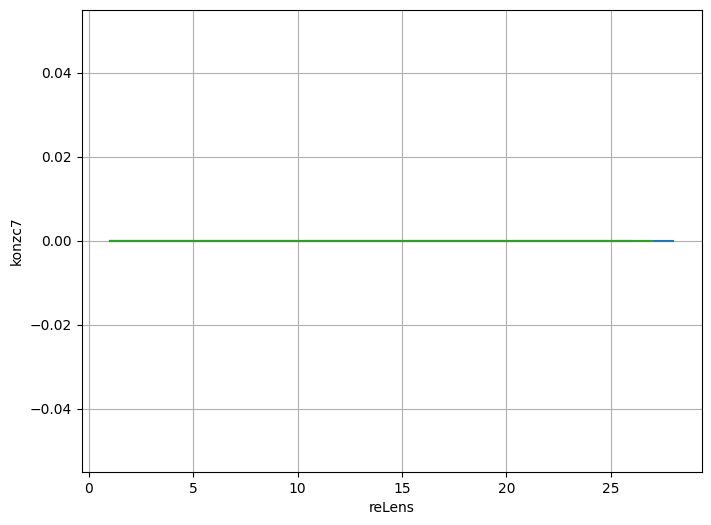

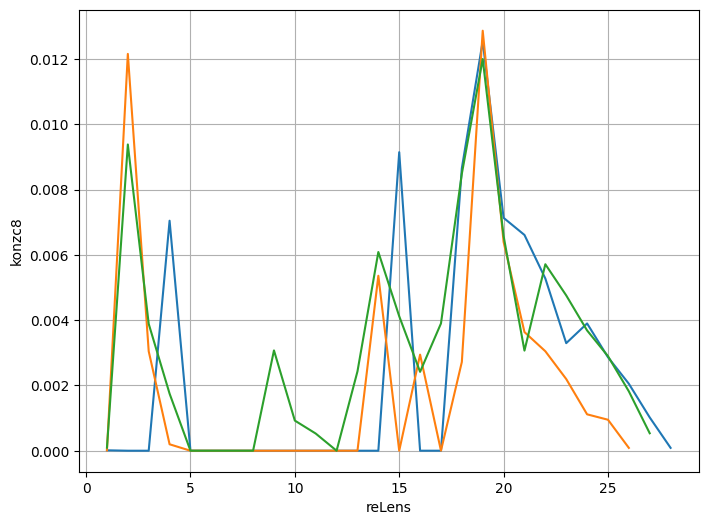

In [27]:
for i in range(9):
    bin_and_plot(dfnew, 'reLens', "konzc"+str(i), doLog=False, colVar = None, psetsInput =["none","earlyDry","lateDry"] )


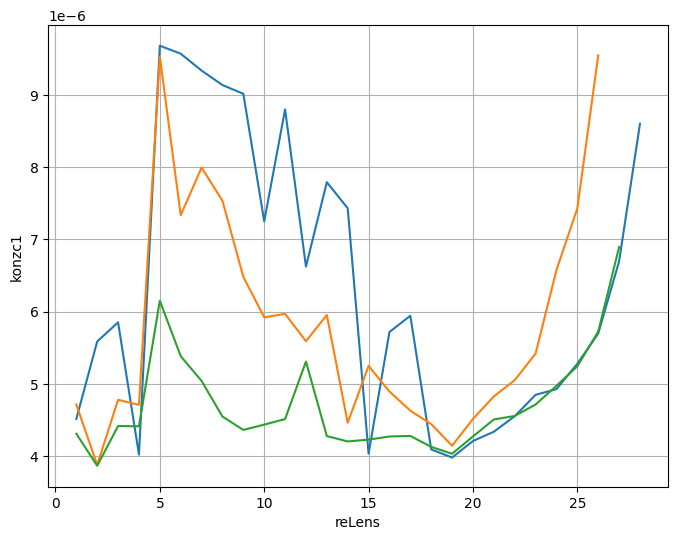

In [9]:
bin_and_plot(dfnew, 'reLens', "konzc1", doLog=False, colVar = None, psetsInput =["none","earlyDry","lateDry"] )

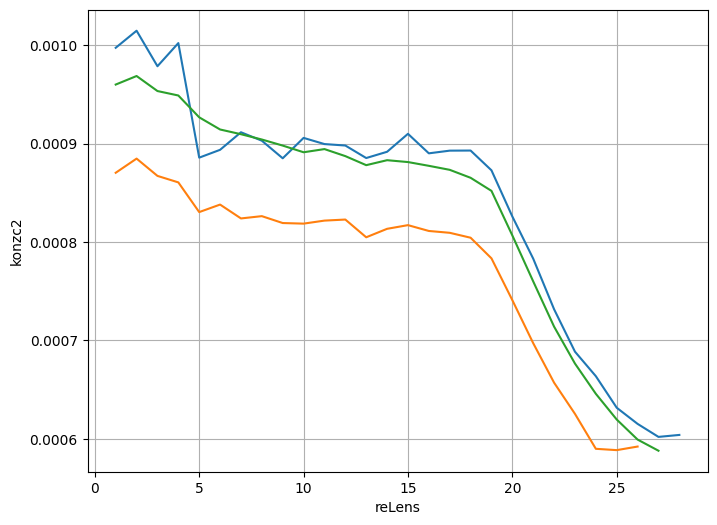

In [10]:
bin_and_plot(dfnew, 'reLens', "konzc2", doLog=False, colVar = None, psetsInput =["none","earlyDry","lateDry"] )

In [9]:
#['locCylId','cs','reLens','pSet']
for i in range(nKonz):
    bin_and_plot(dfnew, 'reLens', 'konzc'+str(i), doLog=False, colVar = None, psetsInput =["none","earlyDry","lateDry"] )

TypeError: can only concatenate str (not "int") to str

<Figure size 800x600 with 0 Axes>

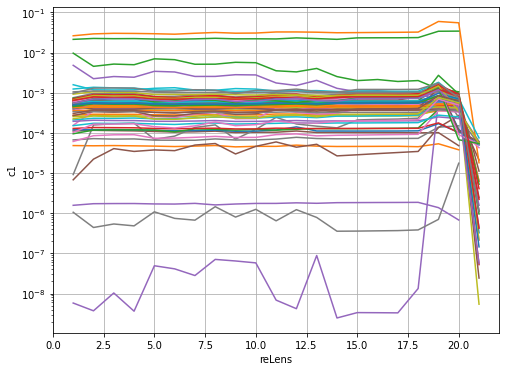

In [18]:

bin_and_plot(dfnew, 'reLens', 'c1', doLog=True, colVar = None)

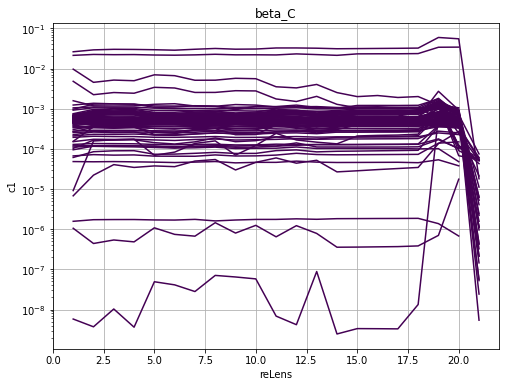

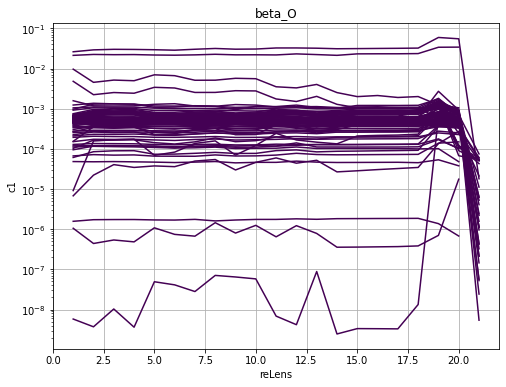

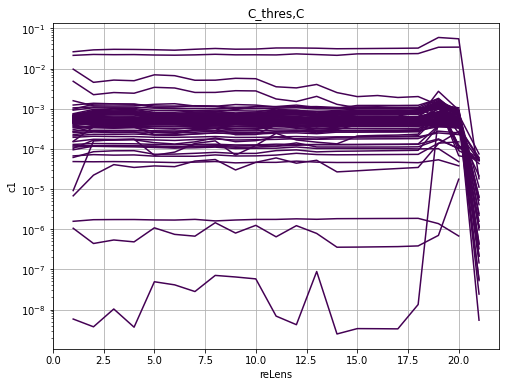

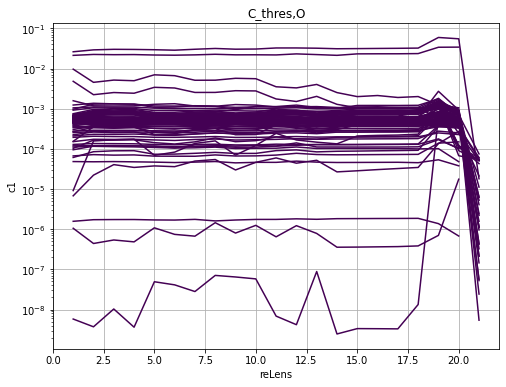

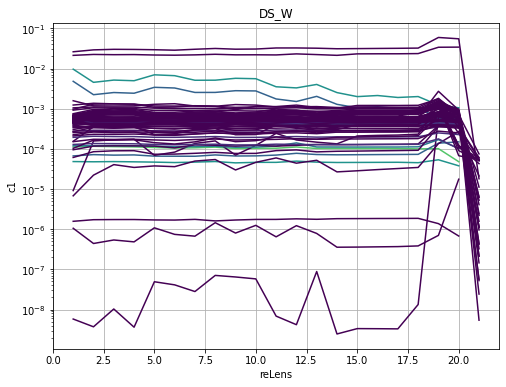

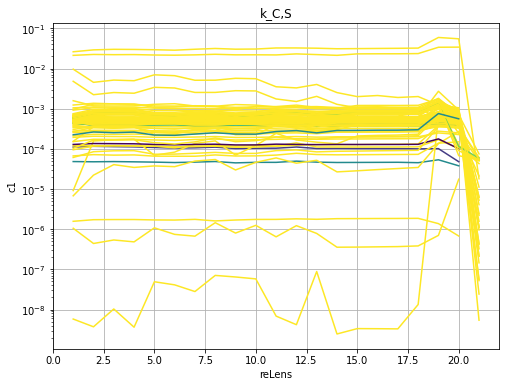

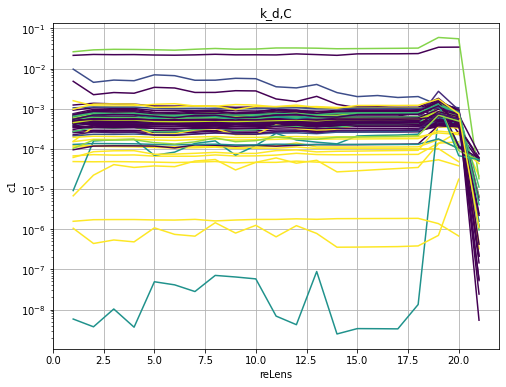

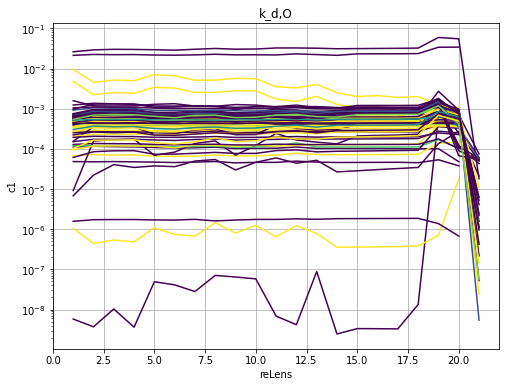

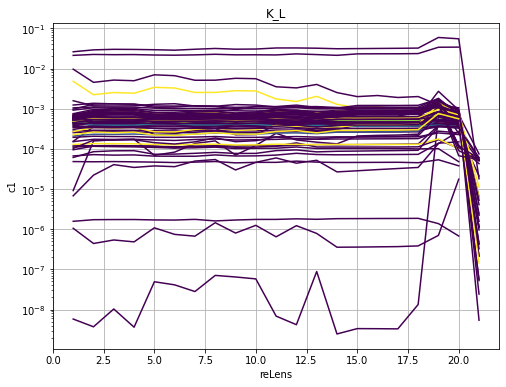

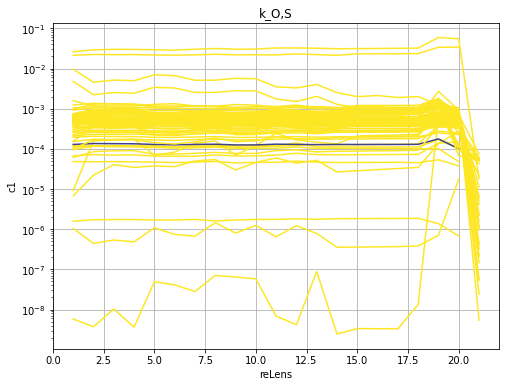

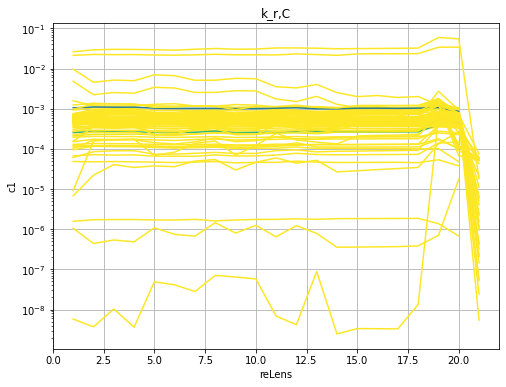

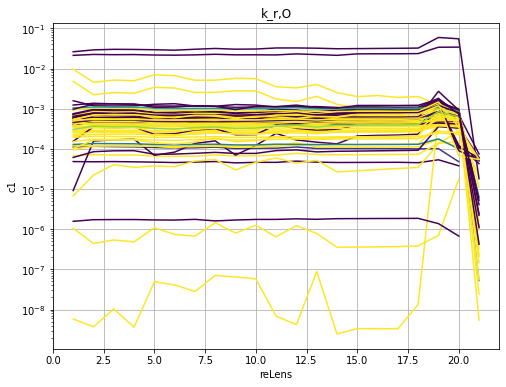

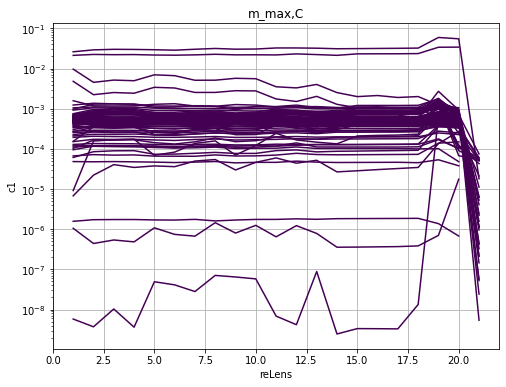

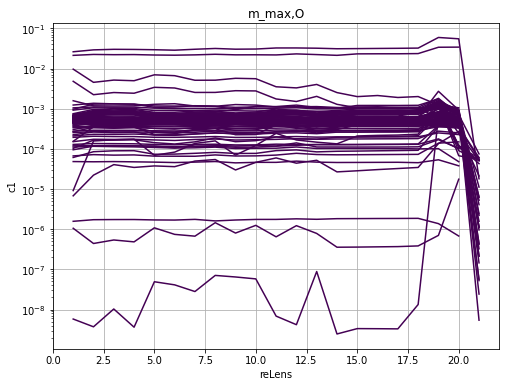

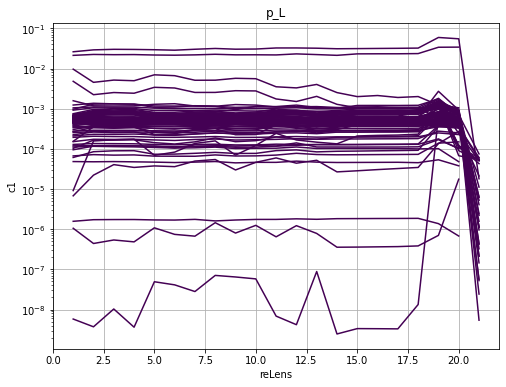

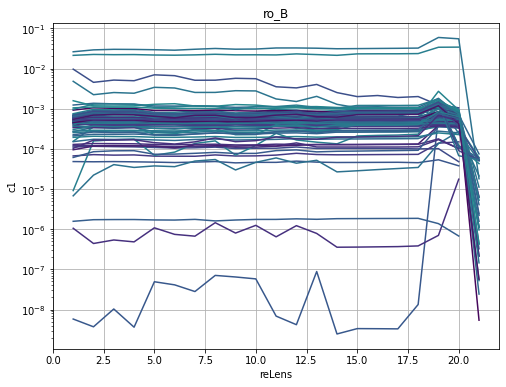

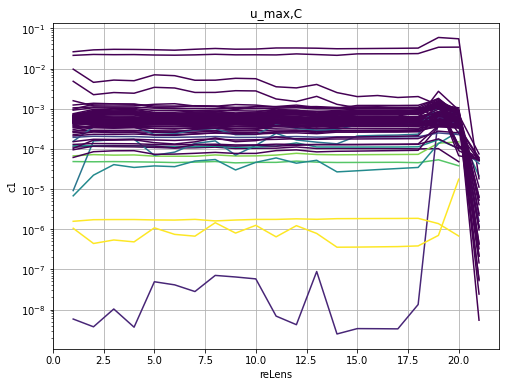

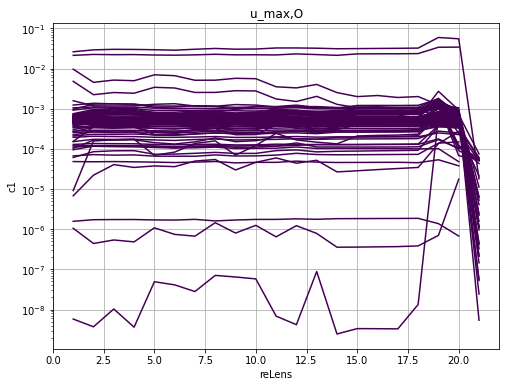

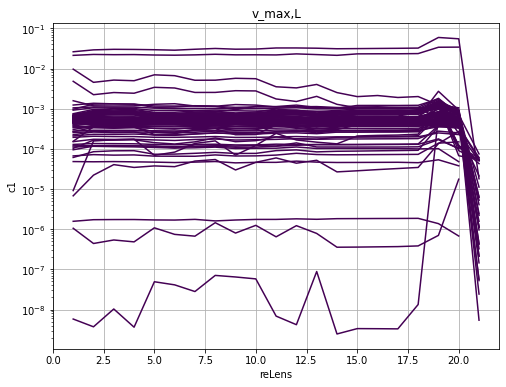

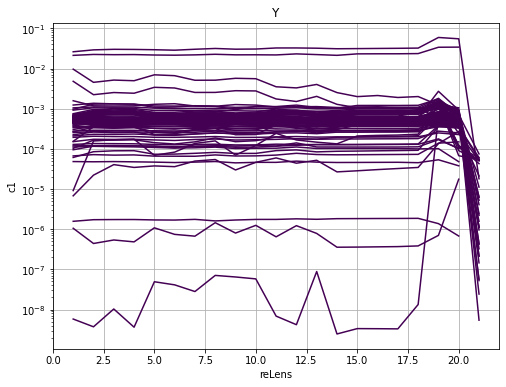

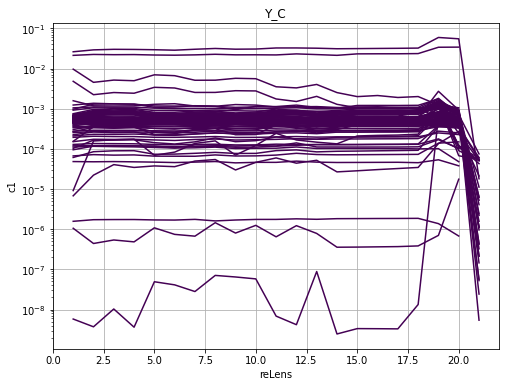

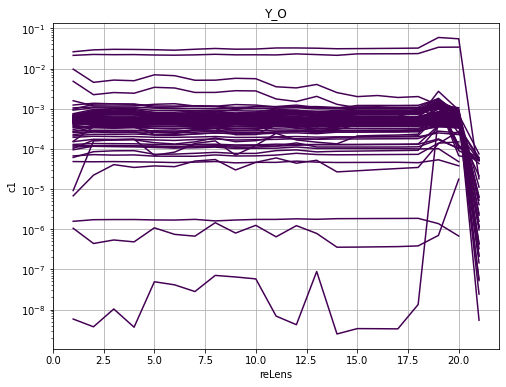

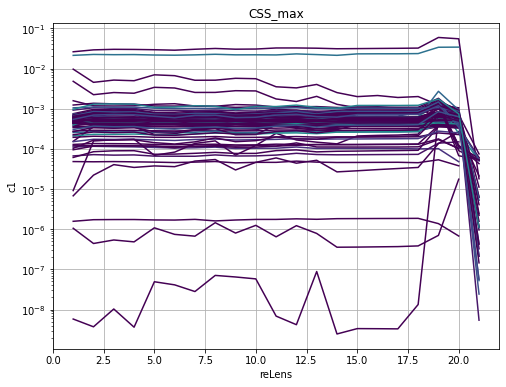

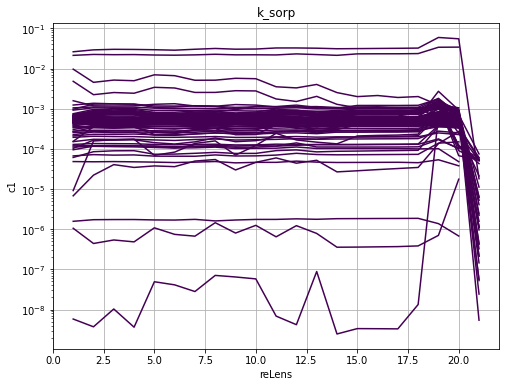

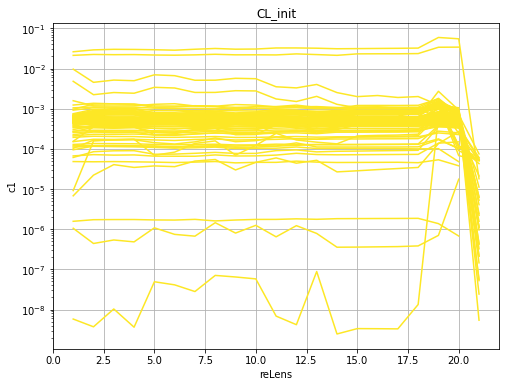

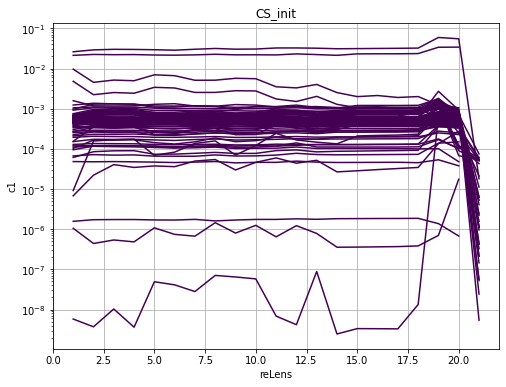

In [26]:
for nn in paramsets.columns.tolist():
    bin_and_plot(dfnew, 'reLens', 'c1', doLog=True, colVar = nn,logcolvar=True)

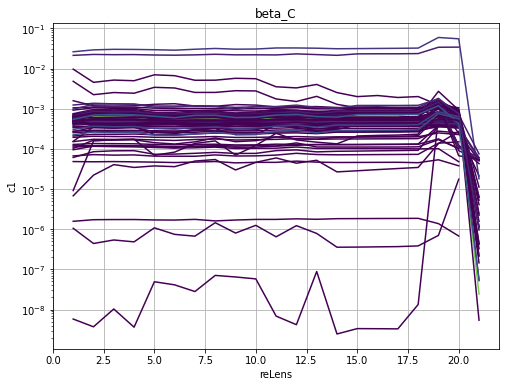

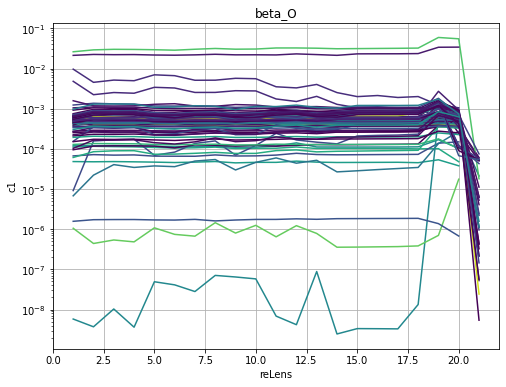

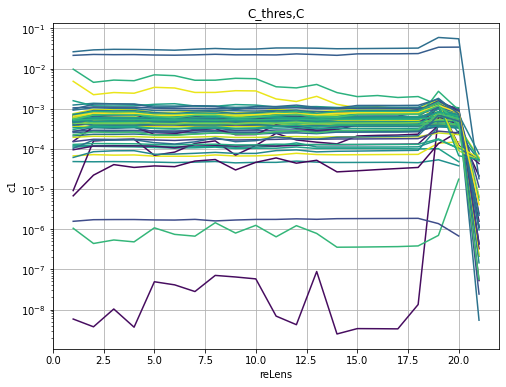

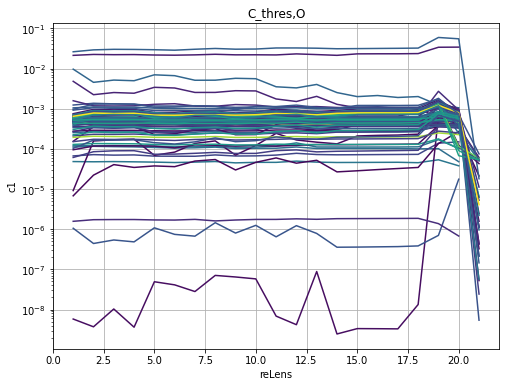

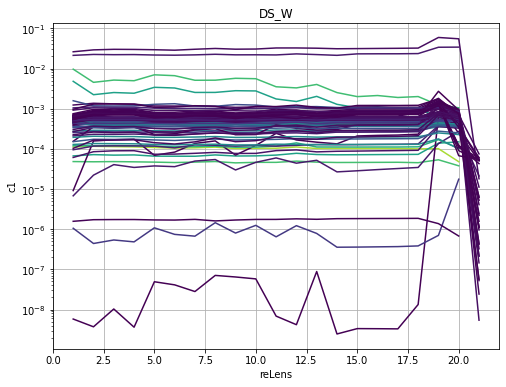

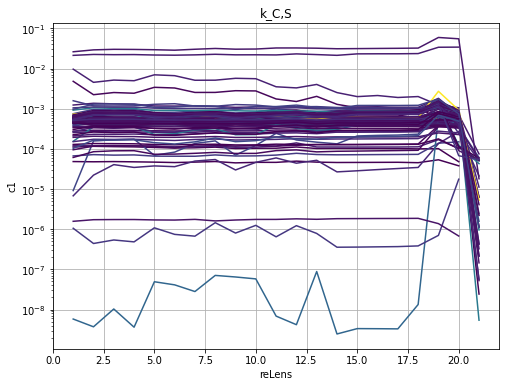

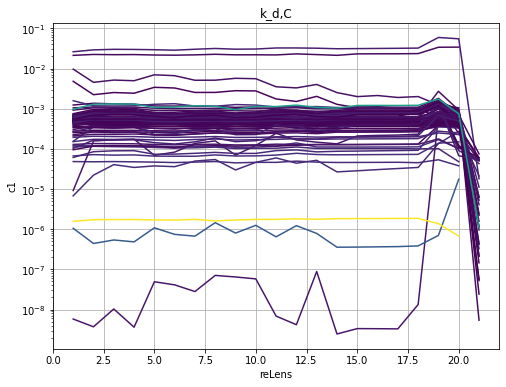

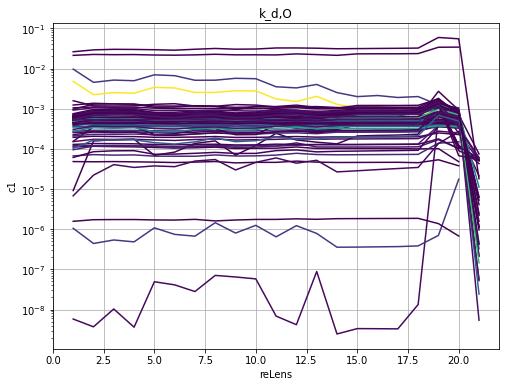

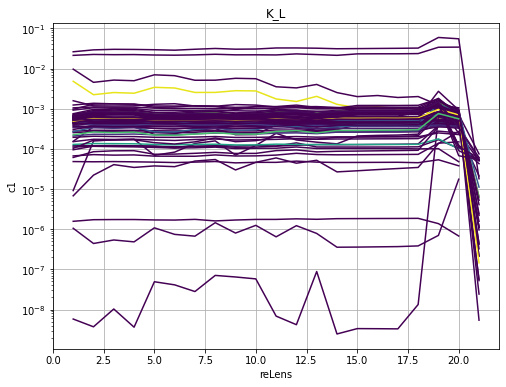

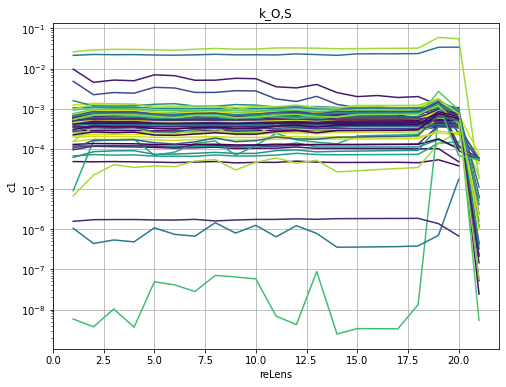

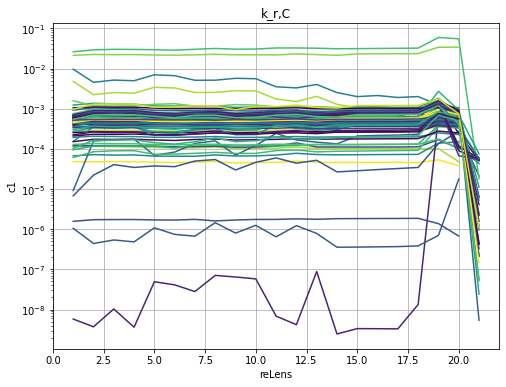

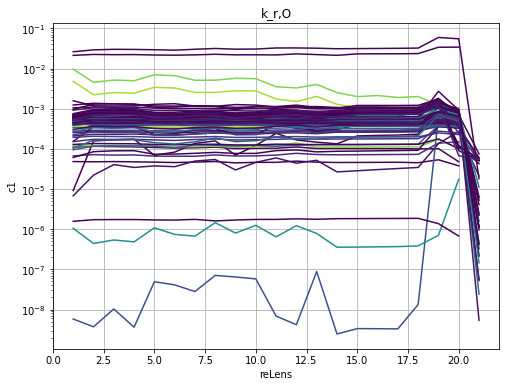

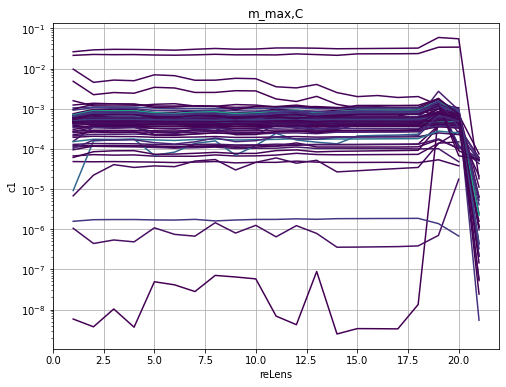

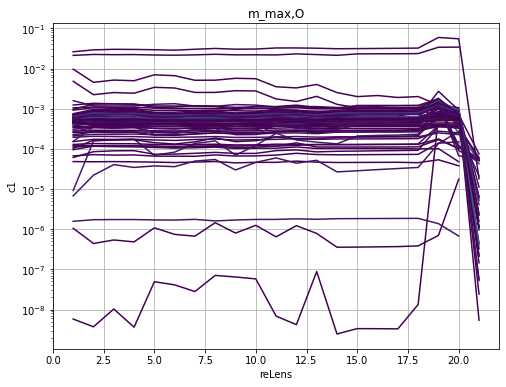

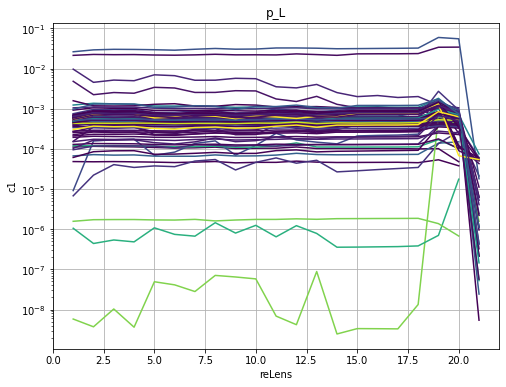

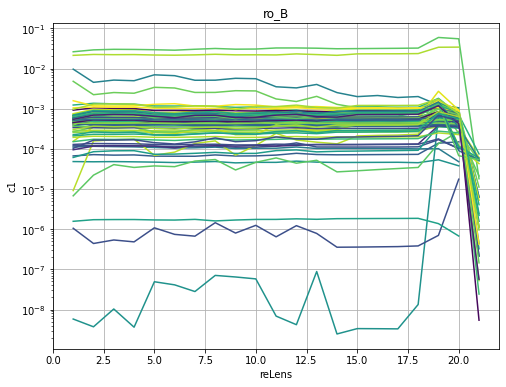

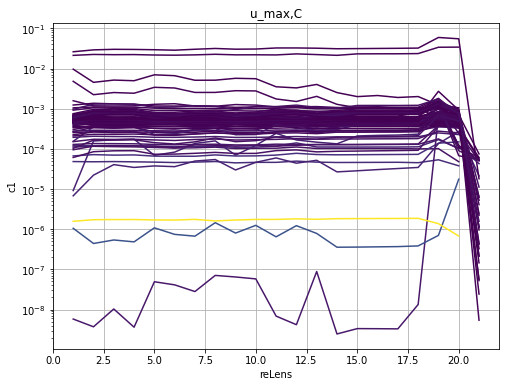

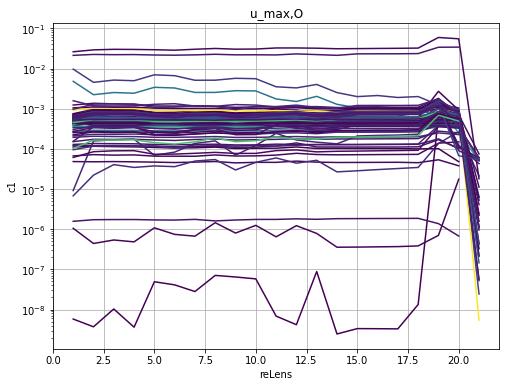

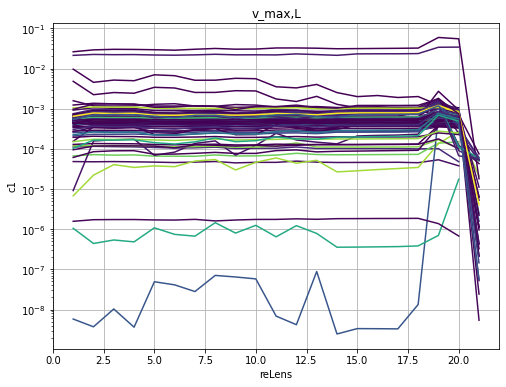

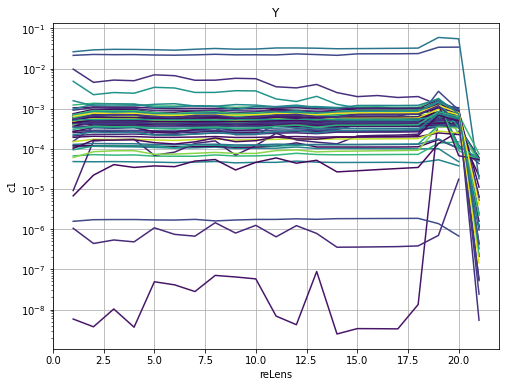

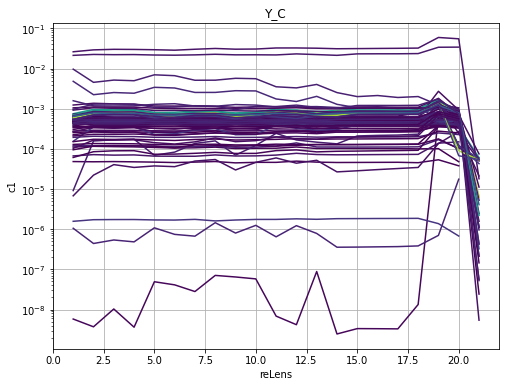

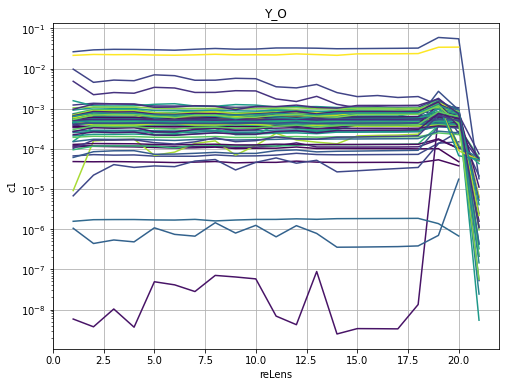

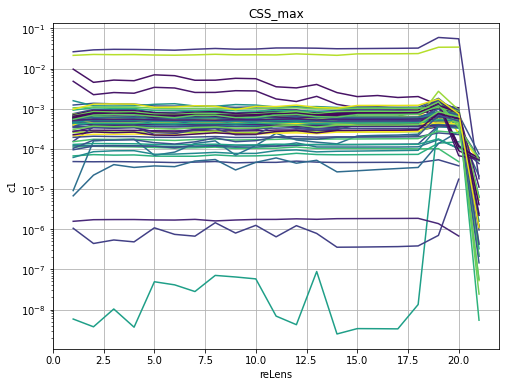

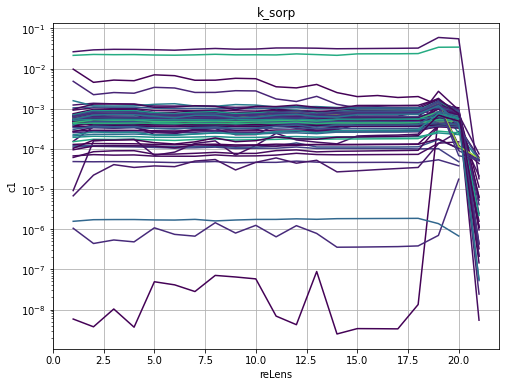

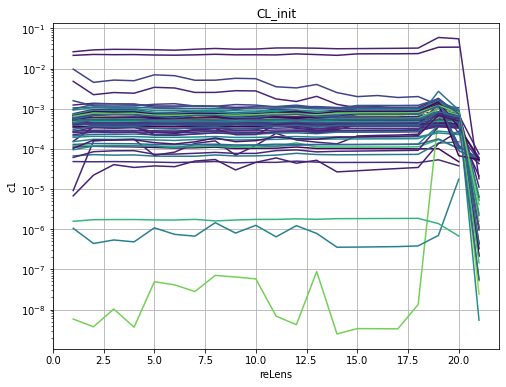

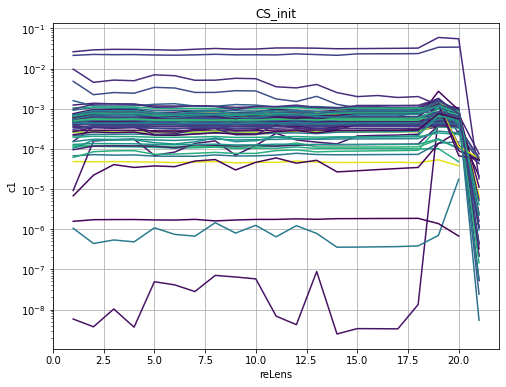

In [27]:
for nn in paramsets.columns.tolist():
    bin_and_plot(dfnew, 'reLens', 'c1', doLog=True, colVar = nn,logcolvar=False)

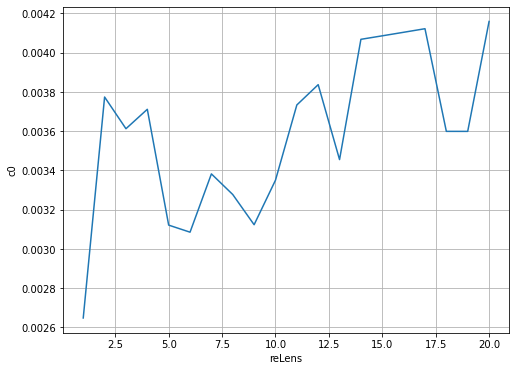

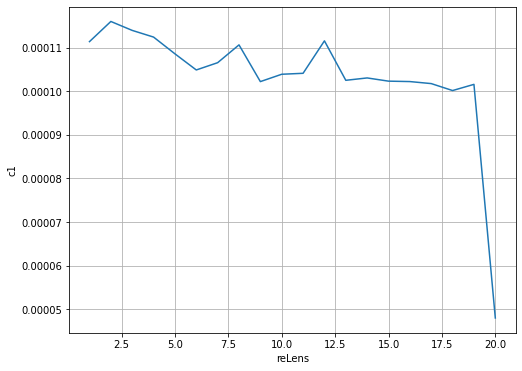

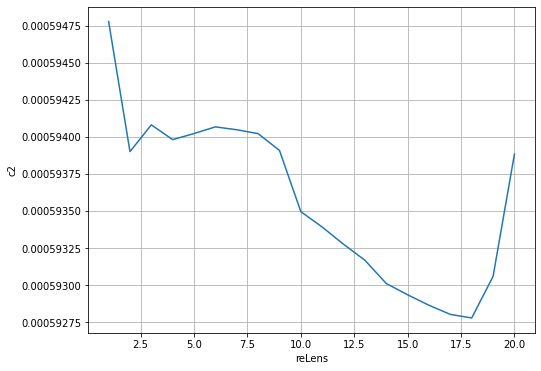

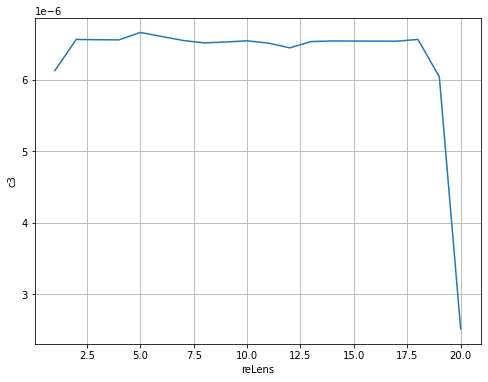

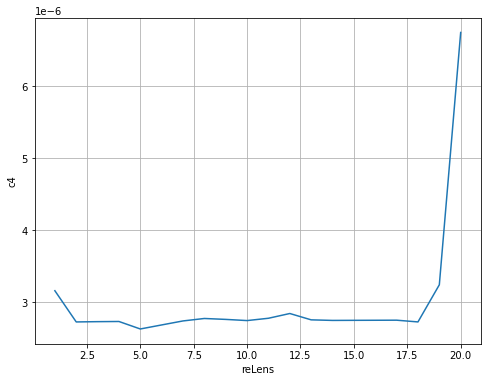

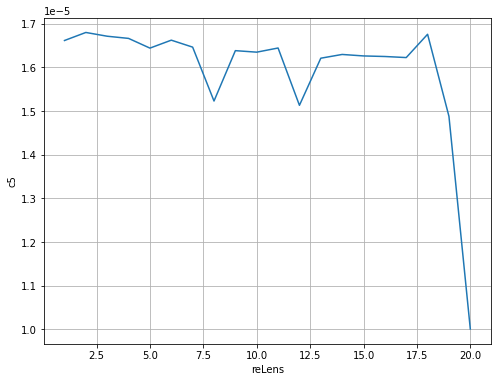

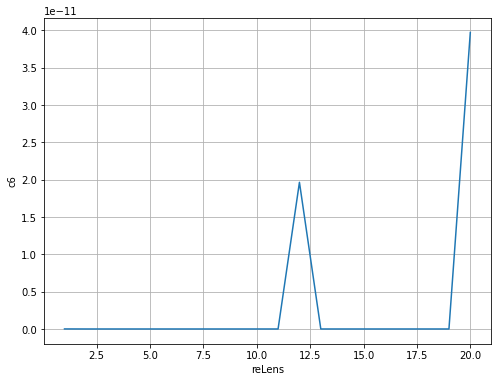

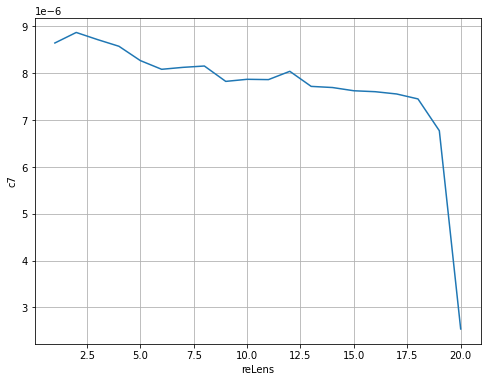

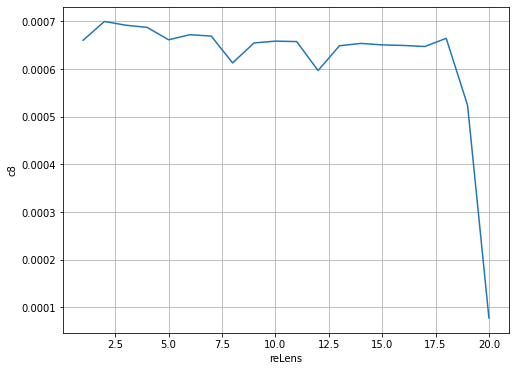

In [29]:

for i in range(nKonz):
    bin_and_plot(dfnew, 'reLens', 'c'+str(i), doLog=False, colVar = None, psetsInput =[5])

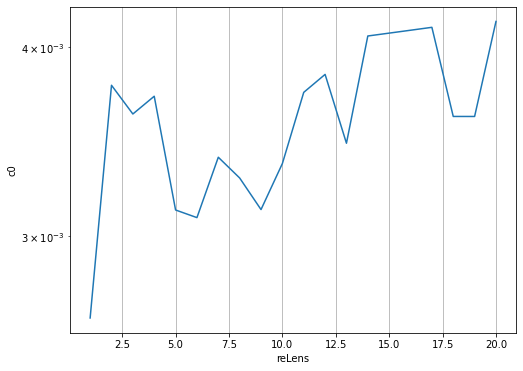

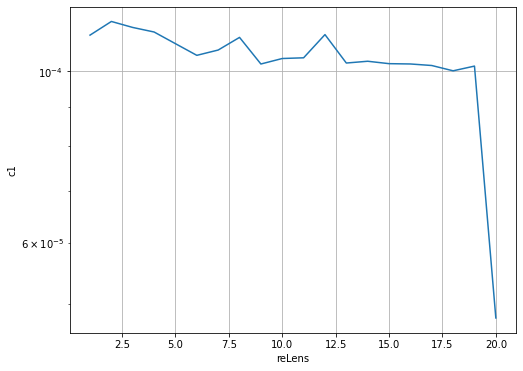

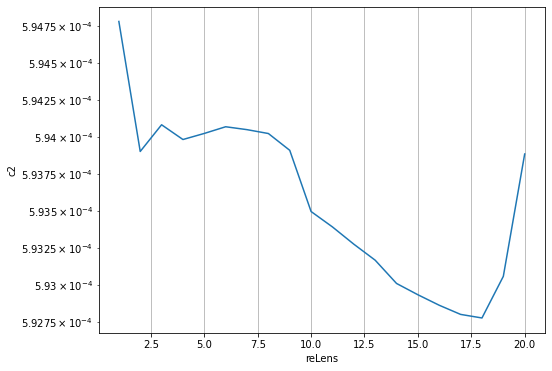

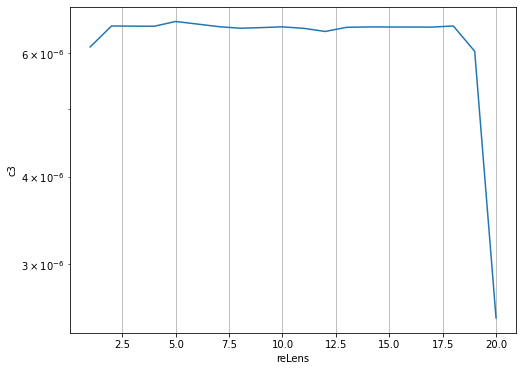

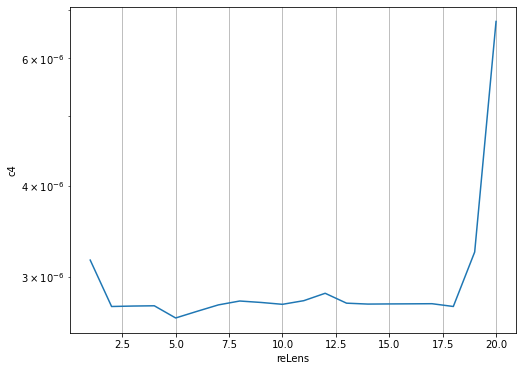

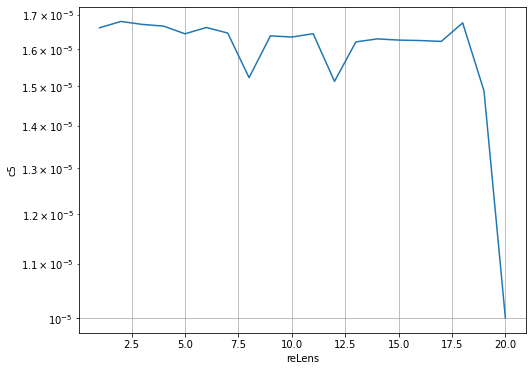

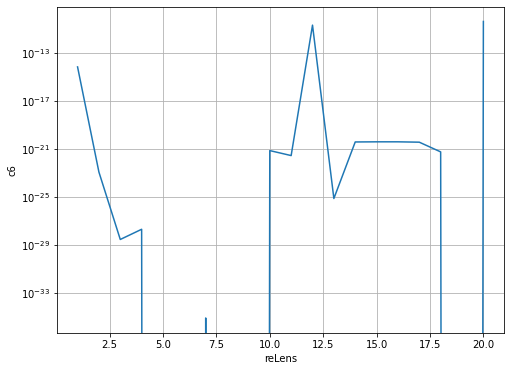

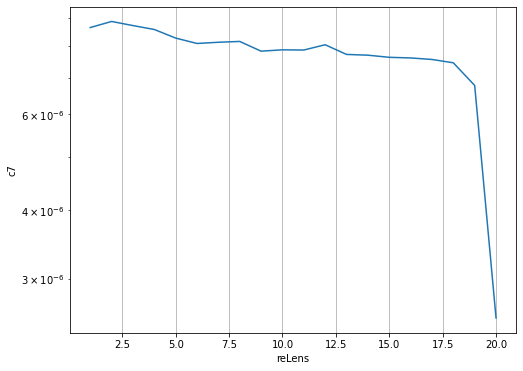

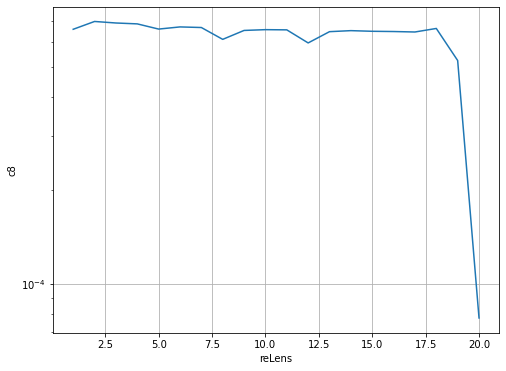

In [31]:

for i in range(nKonz):
    bin_and_plot(dfnew, 'reLens', 'c'+str(i), doLog=True, colVar = None, psetsInput =[5])

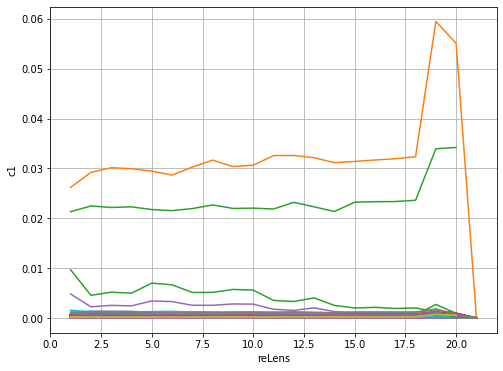

In [30]:

bin_and_plot(dfnew, 'reLens', 'c1', doLog=False, colVar = None)

In [32]:
dfnew['is5'] = dfnew['pSet']==5

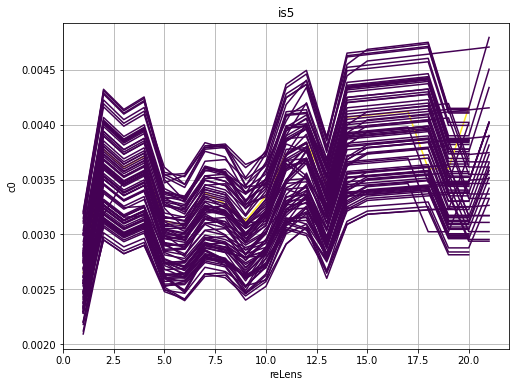

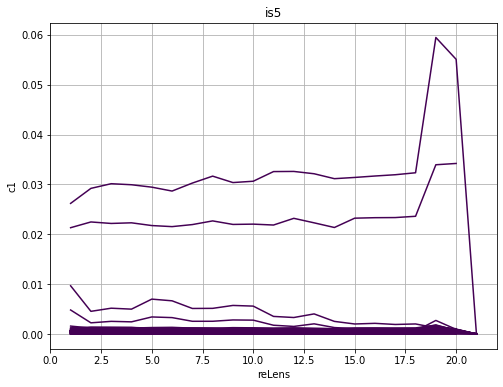

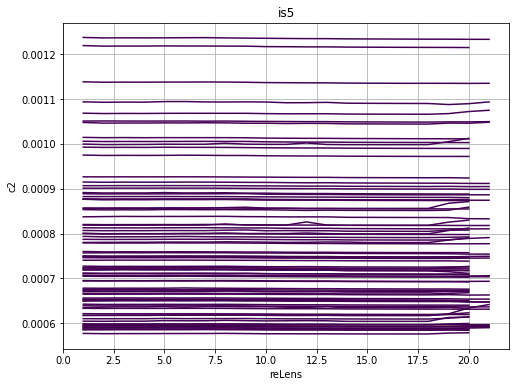

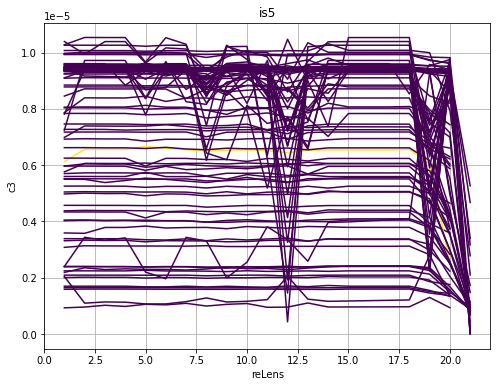

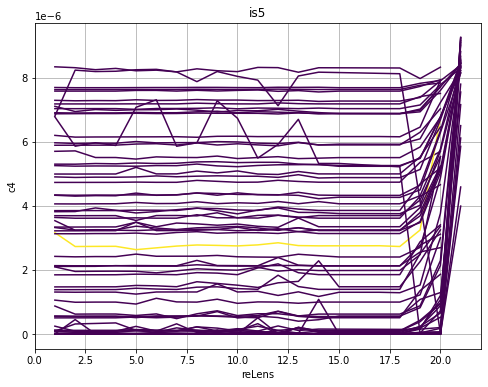

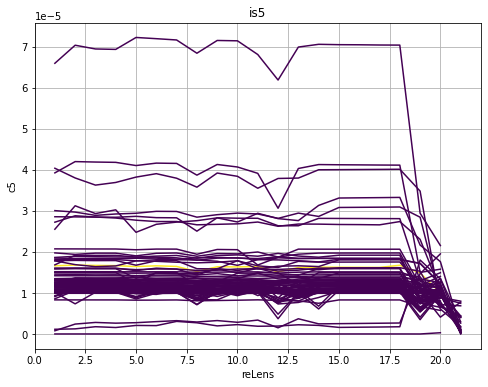

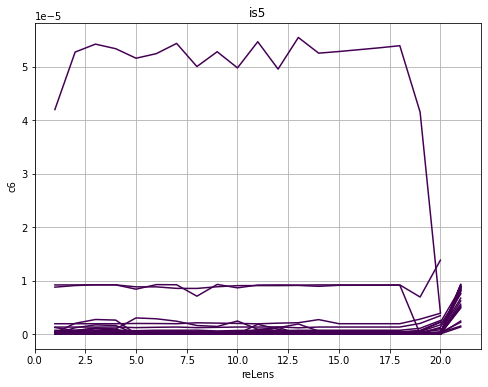

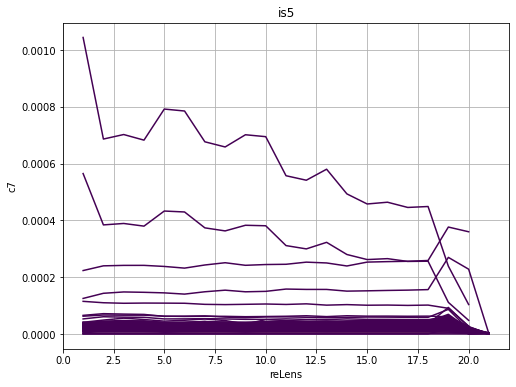

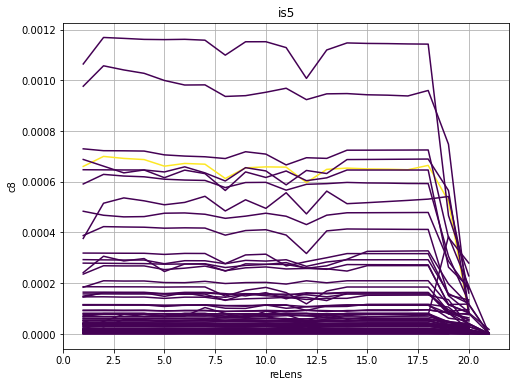

In [37]:

for i in range(nKonz):
    bin_and_plot(dfnew, 'reLens', 'c'+str(i), doLog=False, colVar = 'is5',normalcolvar = False)

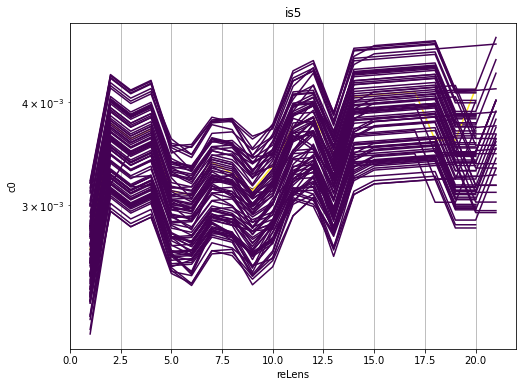

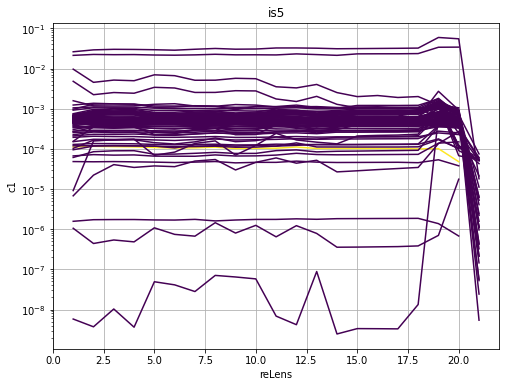

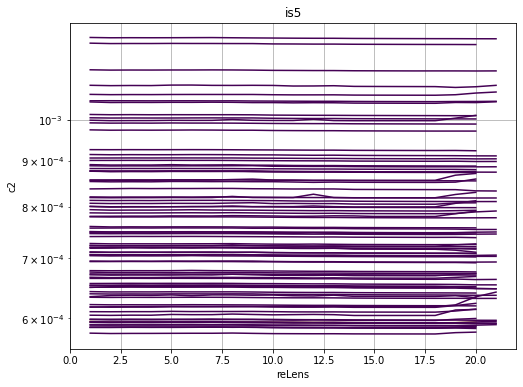

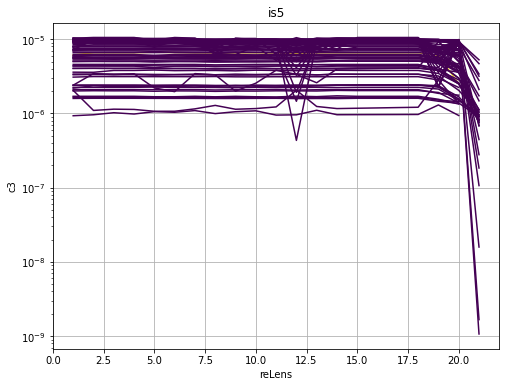

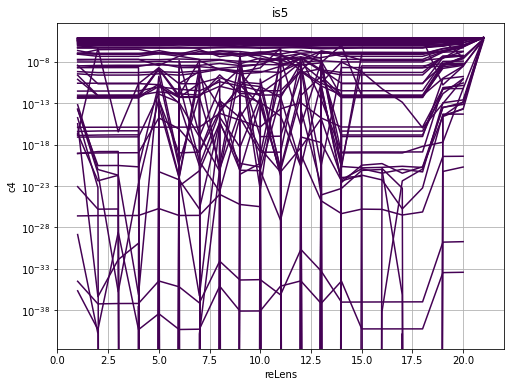

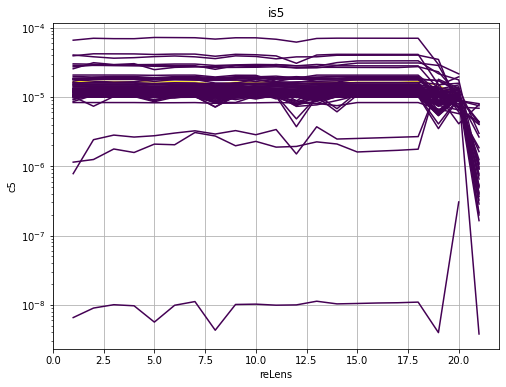

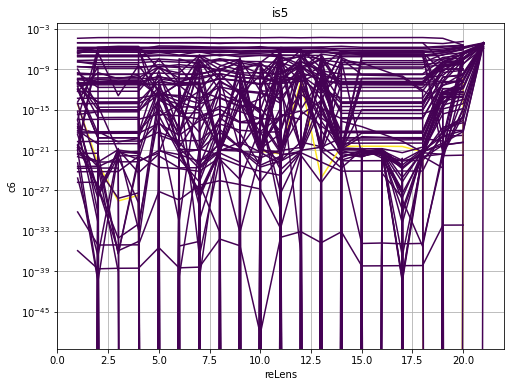

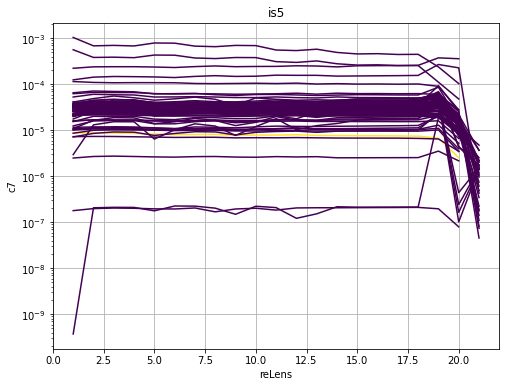

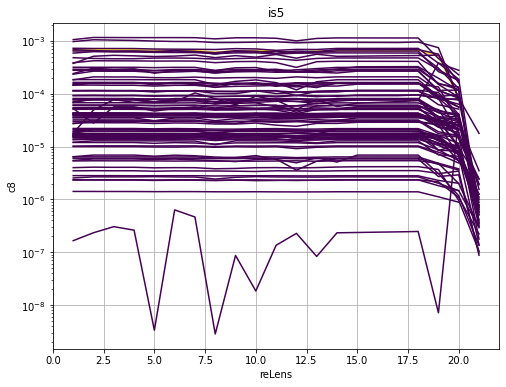

In [38]:

for i in range(nKonz):
    bin_and_plot(dfnew, 'reLens', 'c'+str(i), doLog=True, colVar = 'is5',normalcolvar = False)